# Import libraries

In [1]:
import pandas as pd 

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Import Data-sets

In [5]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv' )

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.shape

(10000, 13)

In [9]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')


# Encoding

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.replace({'Geography':{'France':2 , 'Germany':1 , 'Spain':0}}, inplace=True)

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.replace({'Gender':{'Male':0 , 'Female':1}}, inplace=True)

In [14]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
df.replace({'Num Of Products':{1:0 , 2:1 , 3:1  , 4:1}}, inplace=True)

In [16]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [18]:
df.loc[(df['Balance' ]==0) , 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [19]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

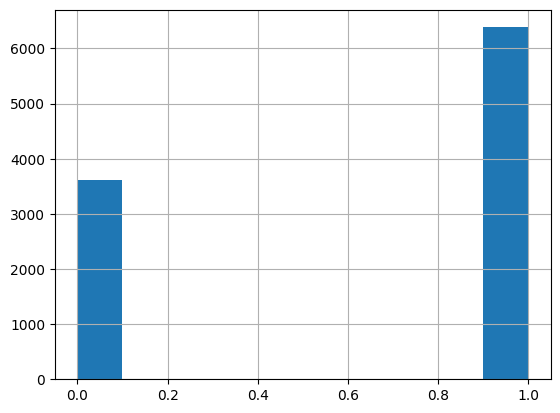

In [20]:
df['Zero Balance'].hist()

In [21]:
df.groupby(['Churn' , 'Geography']).count() 

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Feature

In [22]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [23]:
y = df['Churn']

In [24]:
x = df.drop(['Surname' , 'Churn'], axis = 1)

In [25]:
x.shape, y.shape

((10000, 12), (10000,))

In [26]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

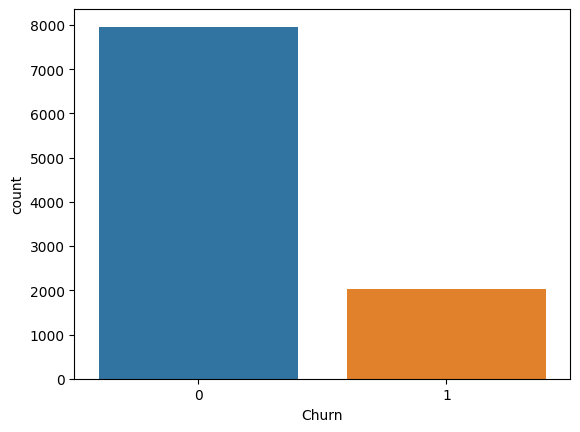

In [27]:
sns.countplot(x='Churn', data = df);

In [28]:
x.shape , y.shape

((10000, 12), (10000,))

 Random Under Sampling

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
rus = RandomOverSampler(random_state =2529)

In [31]:
x_rus,y_rus = rus.fit_resample(x, y)

In [32]:
x_rus.shape ,y_rus.shape ,x.shape , y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [33]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [34]:
y_rus.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

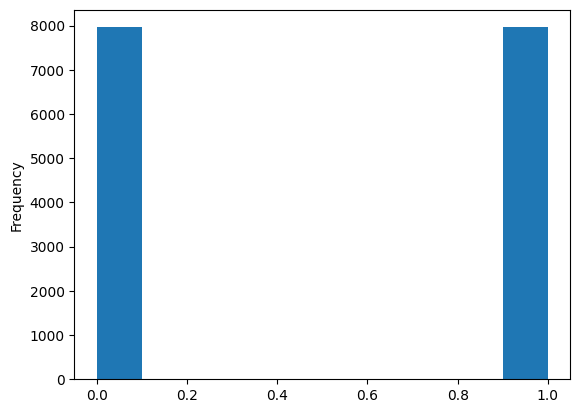

In [35]:
y_rus.plot(kind = 'hist')

# Random over sampling

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(random_state =2529)

In [38]:
x_ros,y_ros = ros.fit_resample(x, y)

In [39]:
x_ros.shape ,y_ros.shape ,x.shape , y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [40]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [41]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

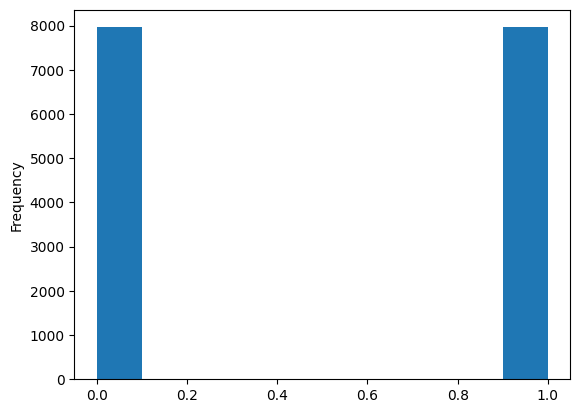

In [44]:
y_ros.plot(kind = 'hist')

# Train test split

In [45]:
from sklearn.model_selection import train_test_split

SPLIT ORIGiNAL DATA

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 , random_state = 2523)

SPLIT RANDOM UNDER SAMPLE DATA

In [47]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus,y_rus, test_size = 0.3 , random_state = 2523)

SPLIT RANDOM OVER SAMPLE DATA

In [48]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros,y_ros, test_size = 0.3 , random_state = 2523)

# Standardize Feature

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

STANDARDIZE ORIGiNAL DATA

In [51]:
x_train[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']])

In [52]:
x_test[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']])

STANDARDIZE RANDOM UNDER SAMPLE

In [53]:
x_train_rus[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']])

In [54]:
x_test_rus[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']])

STANDARDIZE RANDOM OVER SAMPLE

In [55]:
x_train_ros[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']])

In [56]:
x_test_ros[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore', 'Age','Tenure', 'Balance',  'Estimated Salary']])

# Support Vector Machine classifier

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()

In [59]:
svc.fit(x_train , y_train)

SVC()

In [60]:
y_pred =svc.predict(x_test)

# Model Accuracy

In [61]:
from sklearn.metrics import confusion_matrix , classification_report

In [62]:
confusion_matrix(y_test , y_pred)

array([[2385,    0],
       [ 615,    0]])

In [63]:

print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2385
           1       0.00      0.00      0.00       615

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.70      3000



# Hyperparameter Tunning

In [64]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid ={'C':[0.1,1,10],
             'gamma' :[1 , 0.1, 0.01] ,
             'kernel':['rbf'] ,
             'class_weight' : ['balanced']}

In [71]:
grid = GridSearchCV(SVC(), param_grid, refit=True , verbose =2 , cv =2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [72]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [73]:
grid_predictions = grid.predict(x_test)

In [74]:
confusion_matrix(y_test,grid_predictions)

array([[2385,    0],
       [ 615,    0]])

In [75]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2385
           1       0.00      0.00      0.00       615

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.70      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Model with Random Under Sampling 

In [80]:
svc_rus = SVC()

In [81]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [82]:
y_pred_rus = svc_rus.predict(x_test_rus)

Model Accuracy


In [85]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[2385,    0],
       [2393,    0]])

In [86]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2385
           1       0.00      0.00      0.00      2393

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter Tunning

In [87]:
param_grid ={'C':[0.1,1,10],
             'gamma' :[1 , 0.1, 0.01] ,
             'kernel':['rbf'] ,
             'class_weight' : ['balanced']}

In [88]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True , verbose =2 , cv =2)
grid_rus.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [90]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [91]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[2385,    0],
       [ 848, 1545]])

In [93]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2385
           1       1.00      0.65      0.78      2393

    accuracy                           0.82      4778
   macro avg       0.87      0.82      0.82      4778
weighted avg       0.87      0.82      0.82      4778



Model with Random over sampling 

In [94]:
svc_ros = SVC()

In [95]:
svc_ros.fit(x_train_ros , y_train_ros)

SVC()

In [96]:
y_pred_ros = svc_ros.predict(x_test_ros)

Model Accuracy

In [97]:
confusion_matrix(y_test_ros , y_pred_ros)

array([[2385,    0],
       [2393,    0]])

In [98]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2385
           1       0.00      0.00      0.00      2393

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter Tunning

In [99]:
param_grid ={'C':[0.1,1,10],
             'gamma' :[1 , 0.1, 0.01] ,
             'kernel':['rbf'] ,
             'class_weight' : ['balanced']}

In [101]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True , verbose =2 , cv =2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [102]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [103]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [104]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2385,    0],
       [ 139, 2254]])

In [105]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2385
           1       1.00      0.94      0.97      2393

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778



In [106]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2385
           1       0.00      0.00      0.00      2393

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
